# On the Effectiveness of Moving Averages

In Technical Analysis, moving averages are one of the most common tools used to analyze prices. They are often used to do various things, such as:

- identifying trends
- finding support and resistance levels
- generating trade signals

## What is a Moving Average?
There are many types of moving averages, and some are more complex than others. However, for our purposes, the most basic type will serve as a good definition. Generally speaking, a moving average is defined as the running mean over some number of previous timesteps. This calculation is often referred to as a Simple Moving Average, or SMA.

### Simple Moving Average (SMA)
Not much is known about the origins of the SMA and its relation to finance. This is a testament to how ubiqutous its use has become. However, what _is_ known is that the term "moving average" dates back to 1901, and is often credited to English statistician and meteorologist R.H Hooker.

As its name suggests, the calculation for the SMA is easy: at any given timestep, add up the prices from the previous __N__ timesteps and then divide the result by __N__. 

This is done on a "rolling" basis, so all information beyond __N__ periods ago is lost forever (the same is true for all moving averages). For that reason, most people choose to analyze prices by using several different moving averages simultaneously. 

Further, the SMA has some issues. Namely, it weighs prices from any number of periods ago equally to the most recent price. This creates a "lag" between the actual price and the moving average values. This lag is a feature of all moving averages. That being said, many people have come up with ways to reduce the effect of this lag in an effort to produce better trading signals. 

### Exponentially-Weighted Moving Average (EWMA)

Pete Haurlan, who worked for NASA's Jet Propulsion Labratory (JPL) in the 1960s, is the first known trader to apply exponential smoothing to stock prices. Today, this is commonly referred to as the Exponentially-Weighted Moving Average ("EWMA", or sometimes "EMA" for short).

Prior to employing EWMAs for trading stocks, Haurlan applied them in rocketry design. Speficially, he used them in the steering mechanism for rockets, in an attempt to smooth out the calculated error between the rocket's current and desired trajectories.

The calculation for the EWMA is more complex than the SMA. However, it isn't rocket science (pun intended). 

In a nutshell, the EWMA gives more weight to recent prices. For that reason, its values are always closer to the current price relative to an SMA with the same lookback period.

The EWMA differs in that it depends on the previous timestep's EWMA value. In simple terms, this can be written as:
```
Let:
    N = the lookback window
    W = (2/(N+1))

EWMA(t) = (Price(t) - EWMA(t-1)) * W + EWMA(t-1)
```

The SMA and EWMA are the two most commen moving averages used to analyze financial markets. Of course, just because they're the most popular, doesn't mean they're the most useful. There are a plethora of other moving average calculations out there. That being said, for the purposes of this article, we will only use the somewhat-mainstream ones. 

### Linearly-Weighted Moving Average (LWMA)

The Linearly-Weighted Moving Average is similar to the EWMA in that it weighs recent prices more heavily. However, unlike the EWMA, it does so in a linear fashion. That is, the latest price is multiplied by __N__ (Where __N__ is the lookback window) and the earliest price is multipled by 1. The result is then divided by the sum of all numbers 1 through __N__.

Because it weighs prices linearly, it lags more than an EWMA, but less than an SMA. 

### Triangular Moving Average (TMA)

The Triangular Moving Average is unique in the sense that it weighs the middle of the lookback window the heaviest. For this reason, it lags a lot more than its counterparts. It is essentially a doubly-smoothed SMA with two different (but related) lookback periods. The calculation is pretty straightforward:
```
Let:
    N = the lookback window

TMA = SMA(SMA(price, N), N // 2)
```

Note above that the "//" operator is performing floor division.

### Kaufman Adaptive Moving Average (KAMA)

The Kaufman Adaptive Moving Average, developed by Perry Kaufman, aims to account for volatility. Later on, we will talk about why this is so important. The details of this calculation would take a few paragraphs to write about, and I don't want to bore you anymore than I already have. Instead, I will provide this handy link which lays it out pretty well https://school.stockcharts.com/doku.php?id=technical_indicators:kaufman_s_adaptive_moving_average. 

### Wilder Moving Average

Developed by Welles Wilder in 1978, this variation also weighs recent prices more heavily, and is therefore faster than an SMA. Like the Kaufman Adaptive Moving Average, the calculation isn't worth talking about for our purposes. 

However, what you __should__ know is this: Welles Wilder is the person responsible for developing several popular technical indicators; the most popular being the Relative Strength Index (RSI). Naturally, he decided to use his own moving average in those calculations. This is often forgotten by people writing Technical Analysis software. 



## Moving Averages In Practice

As mentioned earlier, moving averages can be used in a lot of different ways--from indentifying trends to generating trading signals. But which moving average works best?

This question was my motive for writing this article. And to answer it, we must start from the ground up.

So, to start, we'll briefly compare the different moving averages just described. To do that, I plotted each of the aforementioned moving averages, calculated using $SPY and a lookback window of 50 days.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from technical_analysis.moving_average import sma, lwma, ema, wilder_ma, kama, tma
from technical_analysis.backtest import Backtest
from technical_analysis.backtest.strategy import MovingAverageCrossover


In [2]:
df = pd.read_csv("etf_sample.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

spy = df[df["ticker"] == "SPY"].copy()
spy

,close,high,low,open,volume,ticker
date,,,,,,
1993-01-29 00:00:00+00:00,24.749743,24.767317,24.644125,24.767317,1003200,SPY
1993-02-01 00:00:00+00:00,24.925772,24.925772,24.767317,24.767317,480500,SPY
1993-02-02 00:00:00+00:00,24.978553,24.996184,24.855360,24.908141,201300,SPY
1993-02-03 00:00:00+00:00,25.242625,25.260200,24.996184,25.013759,529400,SPY
1993-02-04 00:00:00+00:00,25.348243,25.401024,25.048965,25.330612,531500,SPY
...,...,...,...,...,...,...
2024-06-03 00:00:00+00:00,527.800000,529.310000,522.600000,529.020000,46835702,SPY
2024-06-04 00:00:00+00:00,528.390000,529.150000,524.960000,526.460000,34632661,SPY
2024-06-05 00:00:00+00:00,534.670000,534.690000,528.725400,530.770000,47610365,SPY


In [3]:
# simple moving average
sma50 = sma(spy.close, 50)

# exponentially-weighted moving average
ema50 = ema(spy.close, 50)

# triangular moving average
tma50 = tma(spy.close, 50)

# linearly-weighted moving average
lwma50 = lwma(spy.close, 50)

# kaufman adaptive moving average
kama50 = kama(spy.close, 50, min_smoothing_constant=3, max_smoothing_constant=30)

# wilder moving average
wilder50 = wilder_ma(spy.close, 50)



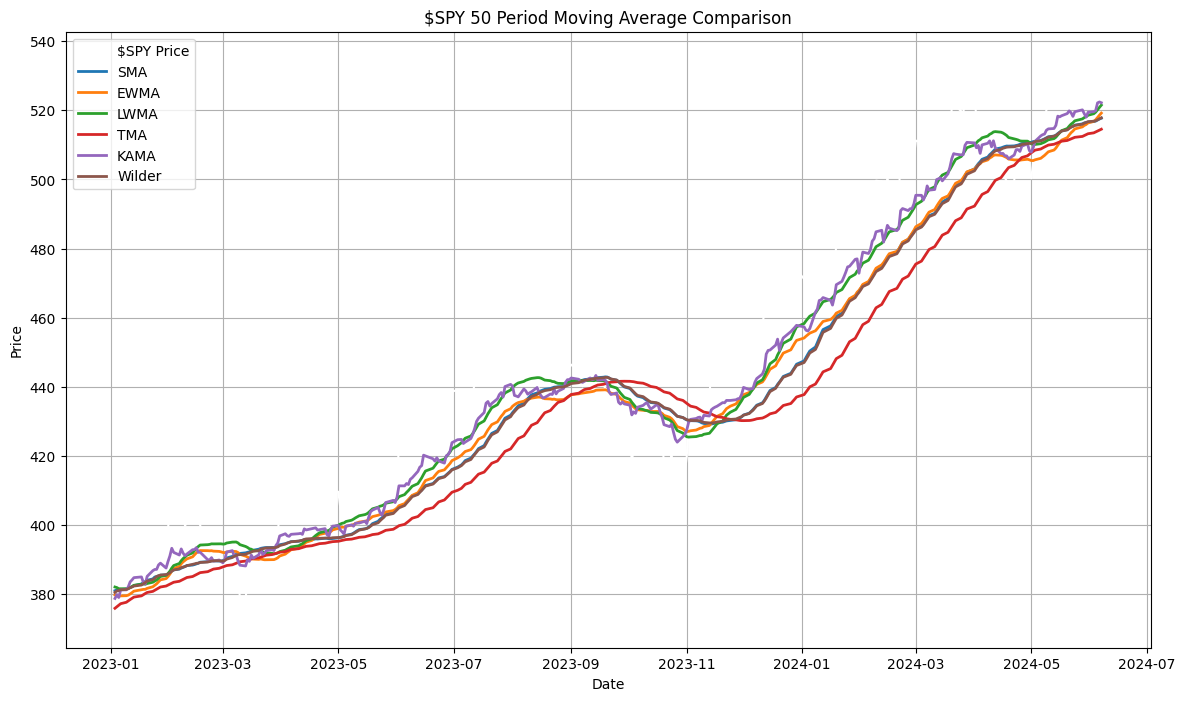

In [4]:
plt.figure(figsize=(14,8))

plot_start_date = "2023-01-01"
plt.plot(spy.close[plot_start_date:], label="$SPY Price", c="white")
plt.plot(sma50[plot_start_date:], label="SMA", linewidth=2)
plt.plot(ema50[plot_start_date:], label="EWMA", linewidth=2)
plt.plot(lwma50[plot_start_date:], label="LWMA", linewidth=2)
plt.plot(tma50[plot_start_date:], label="TMA", linewidth=2)
plt.plot(kama50[plot_start_date:], label="KAMA", linewidth=2)
plt.plot(wilder50[plot_start_date:], label="Wilder", linewidth=2)
plt.title("$SPY 50 Period Moving Average Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


One takeaway from this chart is that the type of moving average you use is important. To demonstrate this, let's look at an example.

Shortly after the October 2023 low, we can see that most of the moving averages began to turn upwards -- beginning with the KAMA, and followed by the rest. At the time, this should have indicated that the bearish move was losing monentum, thus increasing the risk of a reversal.

However, as you can see, the Triangular Moving Average (TMA) took nearly two months to reverse its direction. This means that if you were solely depending on the TMA as an indicator of market strength, you would have exposed yourself to much more risk relative to the other methods.

When it comes to identifying trends, a single moving average might be all we need. For trading signals, however, it can be better to use multiple.

## The Moving Average Crossover Strategy

Broadly speaking, a crossover strategy consists of two different moving averages: one __faster__ and one __slower__. A bullish signal is generated when the faster average crosses __above__ the slower one. A bearish signal, on the other hand, occurs when the when the faster average crosses __beneath__ the slower. 

The idea behind this is simple: 
- The faster average represents the shorter-term trend, while the slower represents the longer-term trend
- When the faster average crosses beneath the slower, it signals a loss of momentum to the upside, which may lead to a short-term reversal
- Likewise, when the faster average crosses back above the slower, it can be interpreted as a loss of momentum to the downside, which could make it easier for the bulls to regain control

Notice my use of words like __"could"__, or __"may"__. These words reflect the fact that conventional crossover strategies, although tried and tested, aren't always reliable. We will touch upon a few reasons for this later on.

The most common types of crossover strategies usually require a 20, 30, or 50 period lookback window for the faster average, and a 50, 100, or 200 period lookback for the longer average. However, some people want a more frequent trading signal. Among this group, it is common for a 9 or 10 period lookback window to be used. 

In terms of which moving average to utilize, the SMA and EWMA are the two most common.

To demonstrate the effectiveness of a moving average crossover strategy, I ran a few tests using the technical-analysis library in python. This is an open-source library I've been working on that aims to provide useful utilities for analyzing stock prices. If you'd like to install or contribute, more info can be found here: https://pypi.org/project/technical-analysis/ . 



In [5]:
spy["ema9"] = ema(spy["close"], period=9)
spy["ema20"] = ema(spy["close"], period=20)

backtest = Backtest(
    entry_criteria=[MovingAverageCrossover("ema9", "ema20", "bullish", lookback_periods=1)],
    exit_criteria=[MovingAverageCrossover("ema9", "ema20", "bearish", lookback_periods=1)],
    max_positions=1,  # can only hold one position at a time
    use_next_open=True  # use next open for entry and exit
)
backtest.run(spy)



In [6]:
dict((k, v) for k, v in backtest.results.items() if k != "returns")

{'benchmark': 20.576385957223053,
 'strategy': 1.8190370673081433,
 'max_drawdown': -0.07892822502419203,
 'max_profit': 0.33960704358092386,
 'avg_return': 0.010637643668468675,
 'std_return': 0.057040776991478165,
 'num_trades': 171}

Num trades: 171


/var/folders/zv/kd1kjzz923x31yty8qyjmy_w0000gn/T/ipykernel_12753/4126068323.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


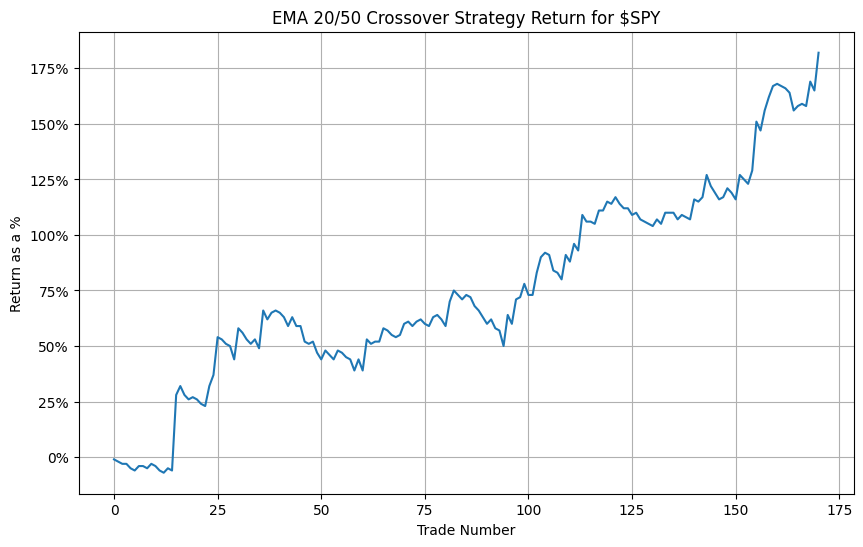

In [7]:
num_trades = len(backtest.results["returns"])
print(f"Num trades: {num_trades}")

accumulated_returns = np.cumsum(backtest.results["returns"]).round(2)

plt.figure(figsize=(10, 6))
plt.plot(accumulated_returns)
plt.grid(True)
plt.title("EMA 20/50 Crossover Strategy Return for $SPY")
plt.ylabel("Return as a %")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.xlabel("Trade Number")
plt.show()

## Finding the Optimal Moving Average Crossover Strategy

The optimal crossover strategy really depends on three things:
1. the lookback period used
2. the type of moving average used
3. the asset in question


The asset in question is important for several reasons. First, while some assets are highly volatile, others are not. And because prices can undergo heavy swings in volatile environments, it wouldn't make sense to rely on the same moving average used in calm, stable ones. 

To make matters worse, the volatility of a singular asset, or even the entire market, can rapidly change over time. So, the optimal moving average used for $TSLA 5 years ago most likely wouldn't be optimal today. The same can be said for the S&P500, Bitcoin, and even the US Dollar. 

To say this differently, volatility itself is volatile. Benoit Mandelbrot, the famed mathematician, related this concept to "market time" -- which is a phrase he used to describe how trading activity isn't evenly distributed throughout time. To quote directly from his book, __The Misbehavior of Markets__:

"On occasion, trading is fast. Scores of news items are flitting across the electronic “crawl” on the bottom of the screen. Phones are ringing. Customers are zapping electronic orders. The volume of trades is climbing, and prices are flying by. On such days are fortunes won or lost. Time flies. Then there are the slow times. No news, only tired reports from the in-house financial analysts to chew over. The customers seem to be on holiday. Trading is thin. Prices are quiet. No big money to be made here; might as well go for a long lunch. Time hangs heavy."




In [8]:
from itertools import combinations

def kaufman(price, period):
    return kama(price, period, 3, 20)

search_periods = [10, 20, 30, 50, 100, 120, 150, 200]
moving_avg_fns = [sma, lwma, ema, wilder_ma, tma, kaufman]

results = {}
mdd_results = {}
n_trades = {}
for fast_pd, slow_pd in combinations(search_periods, r=2):
    results.update({(fast_pd, slow_pd): {}})
    mdd_results.update({(fast_pd, slow_pd): {}})
    n_trades.update({(fast_pd, slow_pd): {}})
    for moving_avg in moving_avg_fns:
        name = moving_avg.__name__
        fast_name = f"{name}{fast_pd}"
        slow_name = f"{name}{slow_pd}"
        spy[fast_name] = moving_avg(spy.close, period=fast_pd)
        spy[slow_name] = moving_avg(spy.close, period=slow_pd)

        backtest = Backtest(
            entry_criteria=[MovingAverageCrossover(fast_name, slow_name, "bullish")],
            exit_criteria=[MovingAverageCrossover(fast_name, slow_name, "bearish")],
            max_positions=1,
            use_next_open=True
        )
        backtest.run(spy)

        results[(fast_pd, slow_pd)].update({name: np.sum(backtest.results["returns"])})
        mdd_results[(fast_pd, slow_pd)].update({name: backtest.results["max_drawdown"]})
        n_trades[(fast_pd, slow_pd)].update({name: len(backtest.results["returns"])})



In [9]:
results_df = pd.DataFrame(results)
mdd_results_df = pd.DataFrame(mdd_results)
n_trades_df = pd.DataFrame(n_trades)
results_df

10                                                     \
                20        30        50        100       120       150   
sma        1.890914  1.899787  2.173930  2.657656  2.652260  2.747535   
lwma       1.896967  2.096721  1.942232  2.692494  2.505512  2.559893   
ema        1.635709  1.846774  2.643813  2.628698  2.711848  2.649582   
wilder_ma  2.198124  1.955433  2.154064  2.668428  2.678140  2.902831   
tma        2.018783  2.409104  2.717837  2.768255  2.767609  3.530569   
kaufman    1.962437  1.895348  2.180014  2.350375  2.446094  2.711931   

                          20                       ...       50             \
                200       30        50        100  ...       100       120   
sma        3.461914  2.211790  2.062768  2.037526  ...  2.506680  2.618527   
lwma       2.691840  1.897554  2.260156  2.605137  ...  2.636598  2.271452   
ema        3.051413  2.215055  2.568586  2.433209  ...  3.170118  3.347467   
wilder_ma  3.440051  1.953840  1.898776  2.130268  ...  2.343795  2.584612   
tma        3.382225  1.687987  2.146436  2.536273  ...  3.085860  3.194037   
kaufman    3.307840  2.067275  1.826744  2.126204  ...  2.508073  2.436768   

                                    100                           120  \
                150       200       120       150       200       150   
sma        3.455789  3.314218  3.061562  2.887009  3.204074  3.009593   
lwma       2.535528  3.226630  2.624595  2.874288  3.152881  2.953814   
ema        3.553772  3.263262  3.426022  4.025892  1.515489  3.948564   
wilder_ma  3.285400  3.414503  3.125916  2.946431  3.317489  3.032106   
tma        3.242823  3.448993  3.219286  3.386899  4.064643  3.496621   
kaufman    3.162123  3.264799  2.714781  2.907327  3.261275  2.956458   

                          150  
                200       200  
sma        3.556092  3.508383  
lwma       3.318895  3.306399  
ema        1.785530  2.273014  
wilder_ma  3.594556  3.746642  
tma        4.136927  4.322955  
kaufman    3.800393  3.559314  

[6 rows x 28 columns]

/var/folders/zv/kd1kjzz923x31yty8qyjmy_w0000gn/T/ipykernel_12753/3436921964.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("Spectral"),
/var/folders/zv/kd1kjzz923x31yty8qyjmy_w0000gn/T/ipykernel_12753/3436921964.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


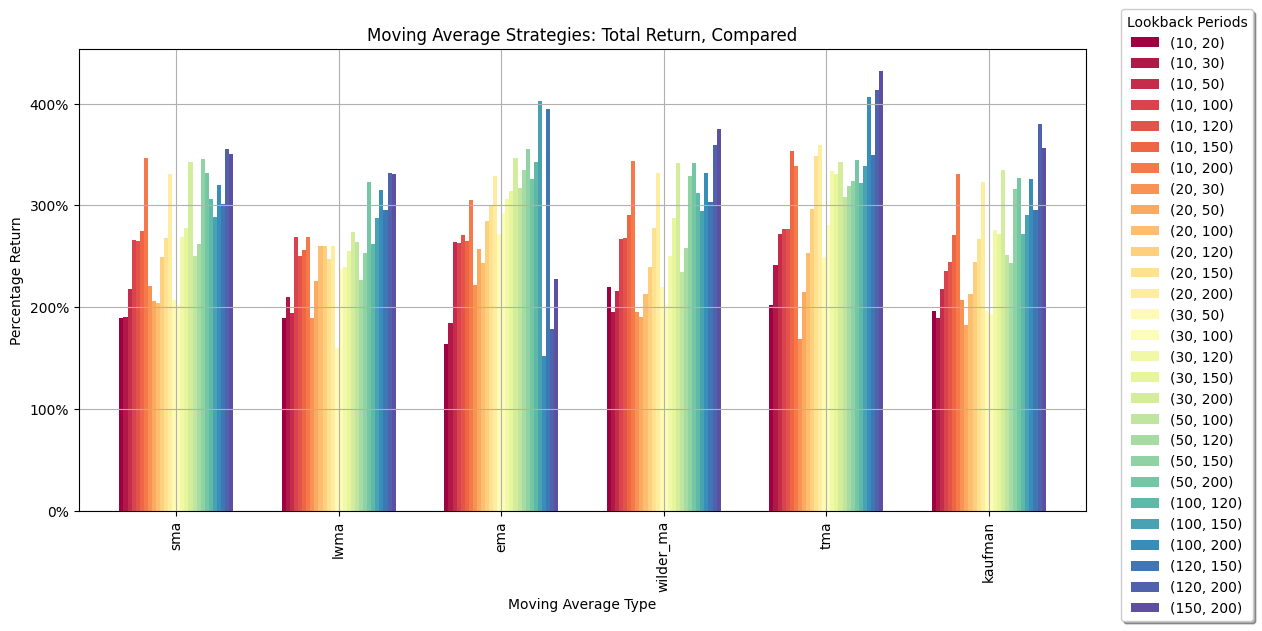

In [10]:
from matplotlib import cm

ax = results_df.plot(
    kind="bar",
    figsize=(13, 6),
    ylabel="Percentage Return",
    xlabel="Moving Average Type",
    title="Moving Average Strategies: Total Return, Compared",
    cmap=cm.get_cmap("Spectral"),
    align="center",
    width=0.7
)
ax.legend(
    loc='upper center',
    title="Lookback Periods",
    bbox_to_anchor=(1.1, 1.1),
    ncol=1,
    fancybox=True,
    shadow=True
)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.grid(True)
plt.show()


In [11]:
spy.index.min(), spy.index.max()

(Timestamp('1993-01-29 00:00:00+0000', tz='UTC'),
 Timestamp('2024-06-07 00:00:00+0000', tz='UTC'))

In [22]:
results_df.max(axis=1)

sma          3.556092
lwma         3.318895
ema          4.025892
wilder_ma    3.746642
tma          4.322955
kaufman      3.800393
dtype: float64

The chart above shows the results of the backtests. The data used was historical $SPY daily data ranging from January 1993 until June 2024. The benchmark for this experiment was the buy-and-hold strategy, which yielded 2,057%.

From looking at the chart, we can conclude that the best results occured when using longer lookback periods. Logically, this makes sense, as using a shorter window will increase the frequency of trade signals. In turn, this increases risk, as it decreases the trustworthiness of the signal. 

The best performing crossover strategy was the Triangular Moving Average (TMA), which yielded 432% using a 150 day lookback for the faster average, and a 200 day lookback for the slower. Note that even the best

It is important to note that even the top-performing strategy couldn't beat the buy-and-hold benchmark. 

Of course, some would argue that maybe "beating the market" isn't the best metric of success. Depending on your risk appetite, there are other things you may want to consider, too. For instance: how long were you exposed in the market? How much money did you risk losing? Ultimately, how "safe" was your money? 

For those who care about risk (which you should), another stat we can interpret is the **Max Drawdown** (MDD) -- which we can define as the performance of the worst losing trade. There are definitely better, more complicated metrics we could look at; but for our purposes, the MDD can act as a cheap proxy for how much downside risk we exposed ourselves to.



/var/folders/zv/kd1kjzz923x31yty8qyjmy_w0000gn/T/ipykernel_12753/1870247798.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("Spectral"),
/var/folders/zv/kd1kjzz923x31yty8qyjmy_w0000gn/T/ipykernel_12753/1870247798.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


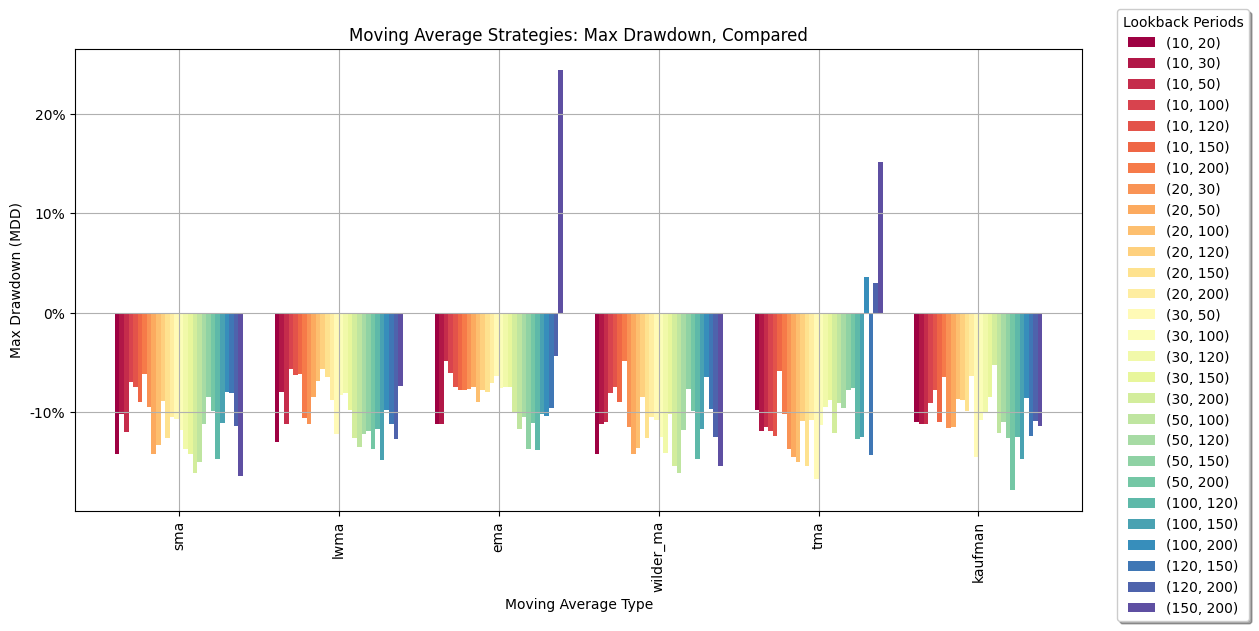

In [24]:
ax = mdd_results_df.plot(
    kind="bar",
    figsize=(13, 6),
    ylabel="Max Drawdown (MDD)",
    xlabel="Moving Average Type",
    title="Moving Average Strategies: Max Drawdown, Compared",
    cmap=cm.get_cmap("Spectral"),
    align="center",
    width=0.8
)
ax.legend(
    loc='upper center',
    title="Lookback Periods",
    bbox_to_anchor=(1.1, 1.1),
    ncol=1,
    fancybox=True,
    shadow=True
)

ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.grid(True)
plt.show()

As you can see above, the MDD of crossover strategies generally isn't great. If you've ever lost 15-20% on a trade before, you know how this feels. That being said, there were a few exceptions to this, namely the EWMA and TMA with longer lookback windows.

The best performing strategy according to MDD was the EWMA with a 100 day lookback for the faster average, and a 150 day lookback for the slower. This strategy's max-drawdown was (positive) 24.4%. I should note that this strategy also yielded the second highest return, at 403%. Given this, one could argue that the EWMA 100/150 is a better stratetgy than the TMA 150/200, as your historical risk-of-loss is lesser. 

So, why is it that the best performing strategies (from both a risk-motivated and profit-motivated standpoint) were the ones that utilized longer lookback horizons?

Well, one reason for this is the fact that a longer lookback yields less frequent trading signals. Likewise, less frequent trading signals means more time in the market. And, since $SPY has had historically heavy bias to the upside, spending more time in the market has meant a convergence towards the buy-and-hold benchmark strategy (which yielded over 2,000%).  

From this we can derive a general truths about moving average crossover strategies: that is, the less we trade, the more we'll profit. This, of course, assumes a bias to the upside, as we see in $SPY. We can visualize this below by plotting the the number of trades vs the total return for each EWMA lookback windows.

/var/folders/zv/kd1kjzz923x31yty8qyjmy_w0000gn/T/ipykernel_12753/890252241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = np.arange(n_trades_df[n_trades_df.index=="ema"].max(axis=1)[0])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/zv/kd1kjzz923x31yty8qyjmy_w0000gn/T/ipykernel_12753/890252241.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


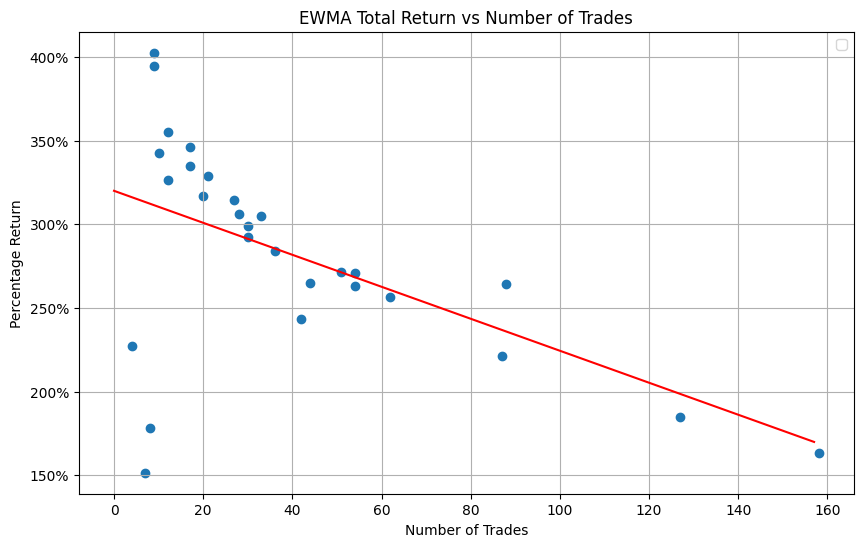

In [34]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.scatter(n_trades_df[n_trades_df.index=="ema"], results_df[results_df.index=="ema"])

plt.ylabel("Percentage Return")
plt.xlabel("Number of Trades")
plt.title("EWMA Total Return vs Number of Trades")
# linear regression
m, b = np.polyfit(
    n_trades_df[n_trades_df.index=="ema"].values.flatten(),
    results_df[results_df.index=="ema"].values.flatten(),
    1
)
# create x from 0 to max number of trades
x = np.arange(n_trades_df[n_trades_df.index=="ema"].max(axis=1)[0])
plt.plot(m*x+b, c="red")
plt.legend()
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.show()


In the above, you can see I found the line of best fit, which clearly trends downwards given a higher number of trades.

To get an overall sense of how the lookback window will effect the number of trades for each moving average type, you can take a look at the below visualization I made. 

/var/folders/zv/kd1kjzz923x31yty8qyjmy_w0000gn/T/ipykernel_12753/3779424131.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("Spectral"),


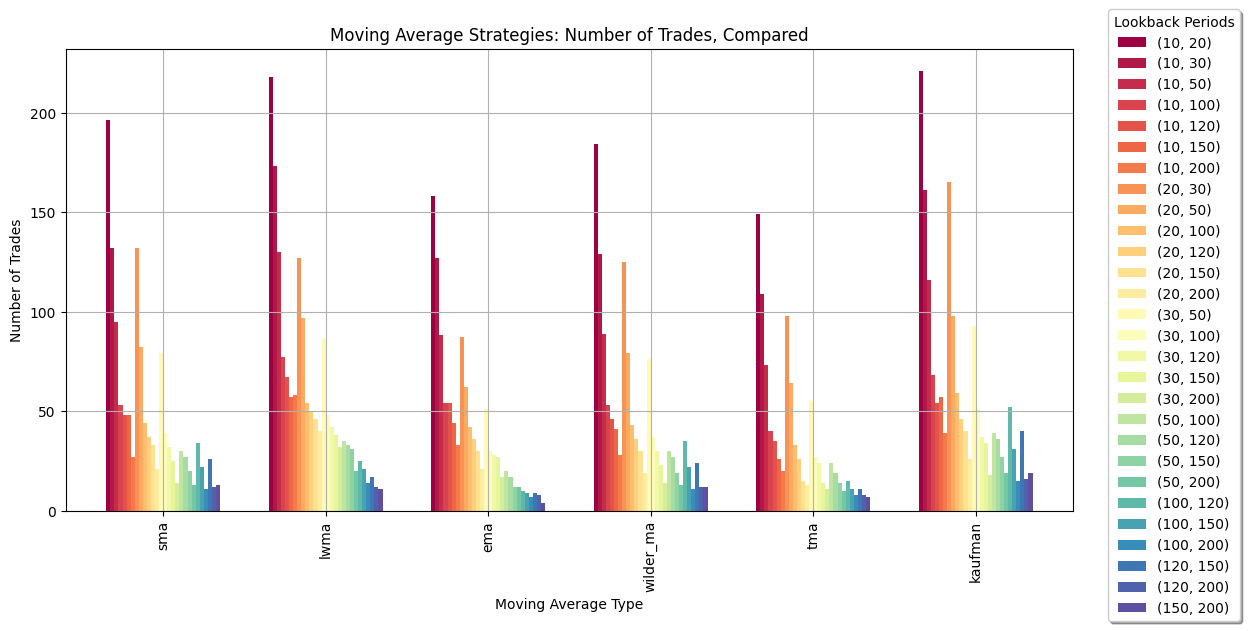

In [36]:
ax = n_trades_df.plot(
    kind="bar",
    figsize=(13, 6),
    ylabel="Number of Trades",
    xlabel="Moving Average Type",
    title="Moving Average Strategies: Number of Trades, Compared",
    cmap=cm.get_cmap("Spectral"),
    align="center",
    width=0.7
)
ax.legend(
    loc='upper center',
    title="Lookback Periods",
    bbox_to_anchor=(1.1, 1.1),
    ncol=1,
    fancybox=True,
    shadow=True
)
plt.grid(True)
plt.show()

So to recap, our best performing strategy in terms of both MDD and total return, used longer lookbacks to produce fewer trades. Despite the positive max-drawdown associated with our best strategy, it's total return was magnitudes lower than our buy-and-hold baseline.

So, can we do any better?

## Multiflavored Moving Average Strategies
As previously mentioned, the basic moving average strategy involved two moving averages, one fast and one slow. But who says these two moving averages have to be of the same type? 

To test the effectiveness of strategies consisting of multiple types of moving averages, I performed a grid-search across different periods, moving averages, and combinations thereof. In total, there were a total of 1,128 combinations searched. The results can be seen below:


In [37]:
def kaufman(price, period):
    return kama(price, period, 3, 20)

search_periods = [10, 20, 30, 50, 100, 120, 150, 200]
moving_avg_fns = [sma, lwma, ema, wilder_ma, tma, kaufman]

moving_avg_combos = []
for p in search_periods:
    for fn in moving_avg_fns:
        moving_avg_combos.append((f"{fn.__name__}{p}", fn, p))

results = {}
for fast, slow in combinations(moving_avg_combos, r=2):
    fast_name, fast_fn, fast_pd = fast
    slow_name, slow_fn, slow_pd = slow
    if fast_pd > slow_pd:
        continue

    spy[fast_name] = fast_fn(spy.close, period=fast_pd)
    spy[slow_name] = slow_fn(spy.close, period=slow_pd)

    backtest = Backtest(
        entry_criteria=[MovingAverageCrossover(fast_name, slow_name, "bullish", lookback_periods=1)],
        exit_criteria=[MovingAverageCrossover(fast_name, slow_name, "bearish", lookback_periods=1)],
        max_positions = 1,
        use_next_open=True
)
    backtest.run(spy)

    backtest_results = backtest.results
    backtest_results["num_trades"] = len(backtest_results["returns"])
    backtest_results["returns"] = np.sum(backtest_results["returns"])
    results.update({f"{fast_name}_{slow_name}": backtest_results})



In [38]:
results_df = pd.DataFrame(results).T
results_df

,benchmark,strategy,max_drawdown,max_profit,avg_return,std_return,num_trades,returns
sma10_lwma10,20.576386,3.041245,-0.205807,0.151321,0.007661,0.029800,397.0,3.041245
sma10_ema10,20.576386,3.237730,-0.195754,0.090729,0.006029,0.026334,537.0,3.237730
sma10_wilder_ma10,20.576386,1.244900,-0.112842,0.130307,0.001815,0.024172,686.0,1.244900
sma10_tma10,20.576386,1.535819,-0.110043,0.184629,0.004970,0.035822,309.0,1.535819
sma10_kaufman10,20.576386,2.893066,-0.159562,0.079976,0.003822,0.020349,757.0,2.893066
...,...,...,...,...,...,...,...,...
ema200_tma200,20.576386,4.130210,-0.093239,2.364169,0.458912,0.698299,9.0,4.130210
ema200_kaufman200,20.576386,1.466249,-0.280939,0.236890,0.010112,0.043576,145.0,1.466249
wilder_ma200_tma200,20.576386,1.915358,0.084578,0.505545,0.319226,0.149671,6.0,1.915358
wilder_ma200_kaufman200,20.576386,0.742017,-0.310470,0.072047,0.007420,0.045690,100.0,0.742017


/var/folders/zv/kd1kjzz923x31yty8qyjmy_w0000gn/T/ipykernel_12753/2043609220.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


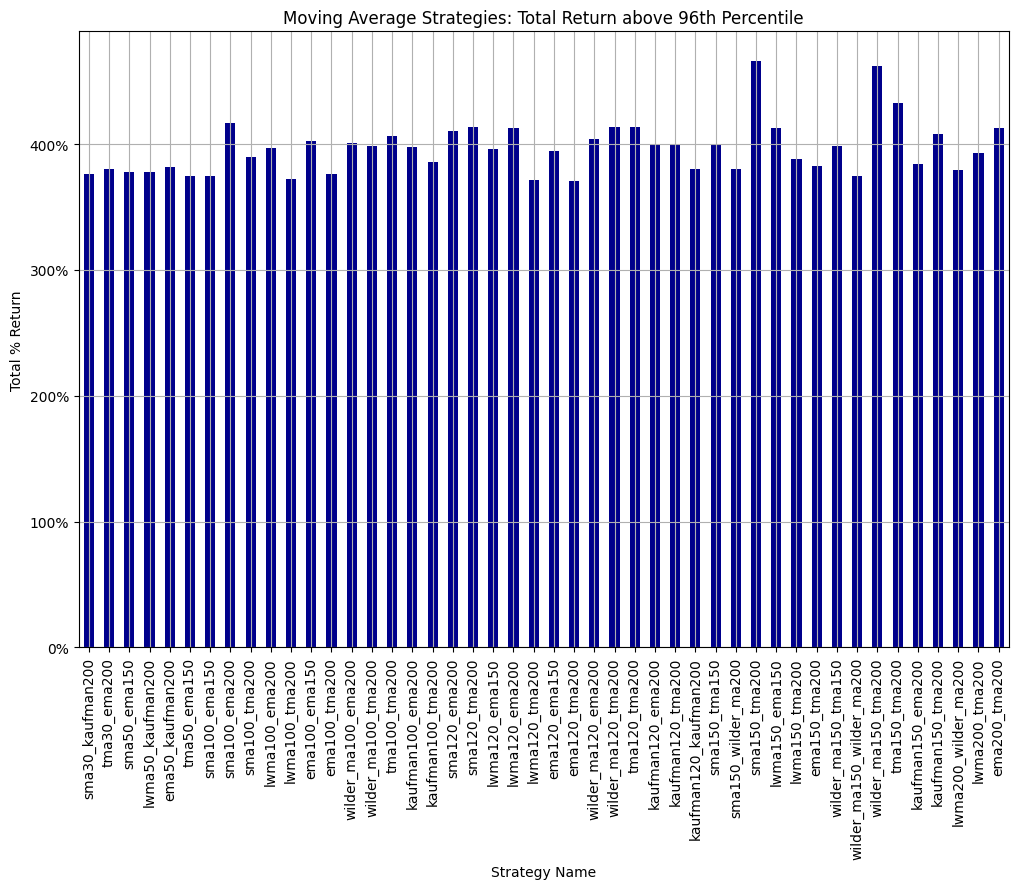

In [41]:
best_results = results_df[results_df.returns > results_df.returns.quantile(0.96)]
ax = best_results.returns.plot(
    kind="bar",
    figsize=(12,8),
    xlabel="Strategy Name",
    ylabel="Total % Return",
    color="darkblue",
    title="Moving Average Strategies: Total Return above 96th Percentile", grid=True
)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.xticks(rotation=90)
plt.show()


In [44]:
results_df[results_df.avg_return == results_df.avg_return.max()]

,benchmark,strategy,max_drawdown,max_profit,avg_return,std_return,num_trades,returns
sma150_tma200,20.576386,4.663124,0.201394,2.210055,0.932625,0.729157,5.0,4.663124


This chart shows the strategies with returns in the 96th percentile. 

The best performing strategy was using a Simple Moving Average with a lookback of 150 for the faster average, and a Triangular Moving Average with a lookback of 200 for the slower. This strategy yielded a 466% return with a +20% max drawdown. Notably, it also yielded the highest average return, at 93% per trade. Note, however, there was only 5 trades executed.

## Conclusion

Moving averages can be effective tools for risk management. Strategies employing moving averages can help risk-adverse traders shield themselves from downturns, while still providing sizable upside profits. However, the profit returned will be substantially smaller (to put it mildly) than the profit returned from a basic buy-and-hold strategy. Of course, this is assuming that the prices of the underlying asset have upward bias over time, as most major stocks do. 

It is important to note that the volatility of the stock will also affect how well a moving average strategy works. If a stock is bouncing around, stuck inside a range, then shorter-term moving averages will produce a larger number of faulty signals. Longer-term moving averages, however, are more resiliant to noise, and so the number of faulty signals will remain low. This is another reason why the longer term strategies outperformed the shorter-term ones in the results provided here.

What I've shared here only scratches the surface. There are many things we can do improve the moving average crossover strategy; the most important being the underlying calculation used.

All moving averages are lagged indicators. This is inherent in the math behind them, as we need to use the previous N days of data to calculate a single value. Ideally, we want to reduce this lag in order to provide more signals to profit from. However, there is a trade off between the lag used and the resulting noise of the signal. So, in order to improve this strategy, you need to find ways to optimize the balance between lag and noise.

In the future, I plan to share some custom moving averages I've created that produce significantly better results than the traditional ones decribed here. The notebook for this post can be found here, if you'd like to replicate these results. In the code, you will notice that the technical-analysis library did all the heavy lifting, including for backtesting and strategy creation! If you'd like to install this library, or if you'd like to contribute, check out the links the below:

- https://pypi.org/project/technical-analysis/
- https://github.com/trevormcguire/technical-analysis
